In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# 1.DOWNLOAD THE DATASET

# 2. LOAD THE DATASET

In [2]:
data = pd.read_csv("abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# ADD 1.5+RINGS AND NAME IT AS AGE

In [3]:
Age=1.5+data.Rings
data["Age"]=Age
data=data.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
data=data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# PERFORM VISUALIZATIONS

# (i) UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Age', ylabel='Count'>

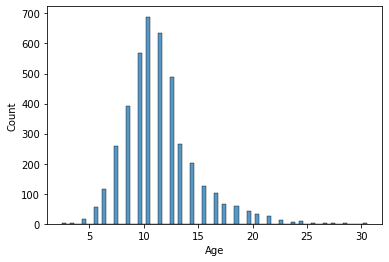

In [4]:
sns.histplot(data["Age"])

<AxesSubplot:>

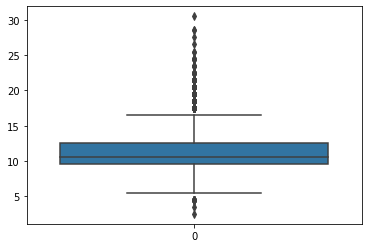

In [5]:
sns.boxplot(data['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

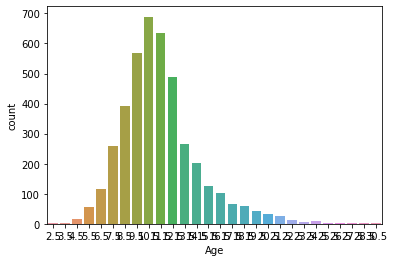

In [6]:
sns.countplot(x=data.Age)

# (ii)BI-VARIATE ANALYSIS

<AxesSubplot:xlabel='Age', ylabel='Length'>

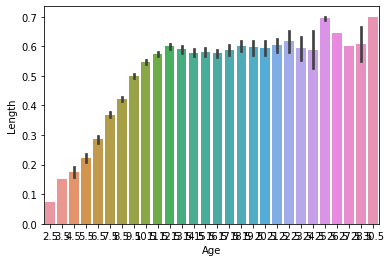

In [7]:
sns.barplot(x=data.Age, y=data.Length)

<AxesSubplot:xlabel='Age', ylabel='Length'>

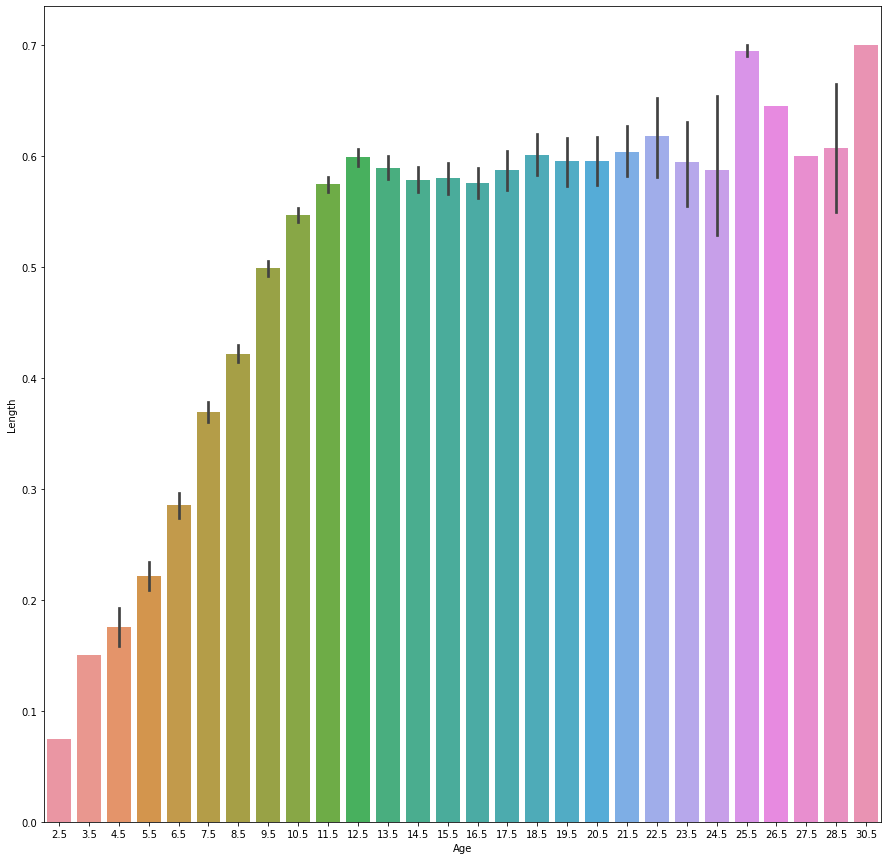

In [8]:
plt.figure(figsize=(15,15))
sns.barplot(x=data.Age , y=data.Length)

# (iii)MULTI-VARIATE ANALYSIS

<AxesSubplot:>

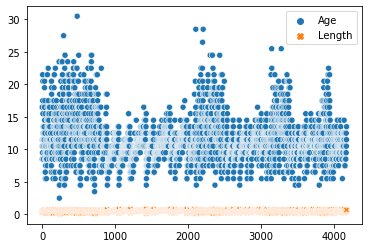

In [9]:
sns.scatterplot((data['Age'], data['Length']))

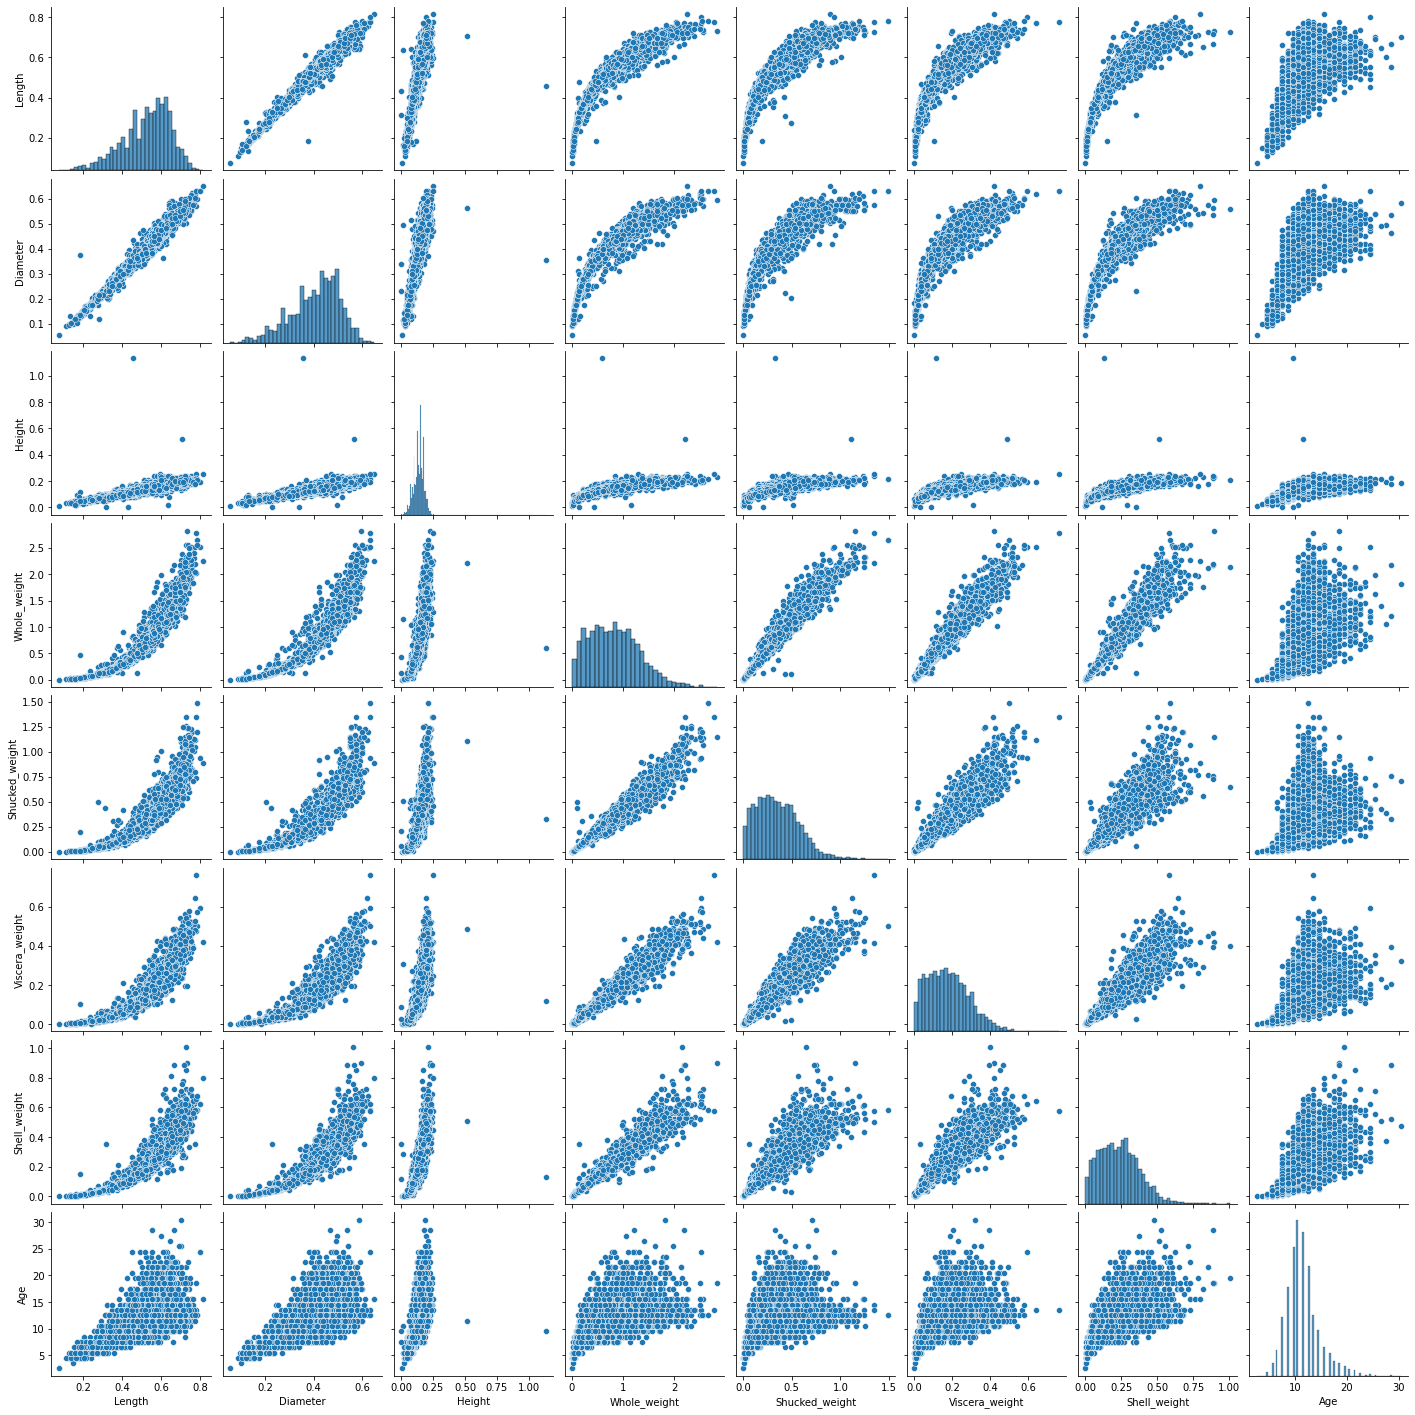

In [10]:
sns.pairplot(data)

<AxesSubplot:>

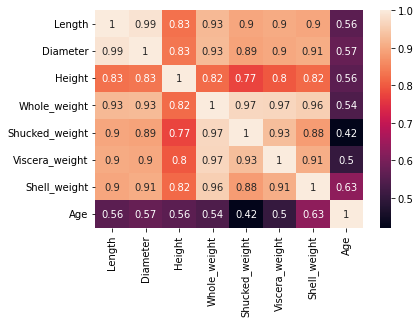

In [11]:
sns.heatmap(data.corr(), annot = True)

# 4.DESCRIPTIVE ANALYSIS

In [12]:
data[['Age','Length']].mean()

Age       11.433684
Length     0.523992
dtype: float64

In [13]:
data[['Age','Length']].median()

Age       10.500
Length     0.545
dtype: float64

In [14]:
data[['Age','Length']].mode()

,Age,Length
0,10.5,0.550
1,NaN,0.625


In [15]:
data[['Age','Length']].var()

Age       10.395266
Length     0.014422
dtype: float64

In [16]:
data[['Age','Length']].std()

Age       3.224169
Length    0.120093
dtype: float64

In [17]:
data[['Age','Length']].describe()

,Age,Length
count,4177.000000,4177.000000
mean,11.433684,0.523992
std,3.224169,0.120093
min,2.500000,0.075000
25%,9.500000,0.450000
50%,10.500000,0.545000
75%,12.500000,0.615000
max,30.500000,0.815000


# 5.HANDLE THE MISSING VALUES

In [18]:
data.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole_weight      False
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
Age               False
dtype: bool

In [19]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

# 6.FINDING OUTLIERS AND REPLACING THEM

<AxesSubplot:xlabel='Age'>

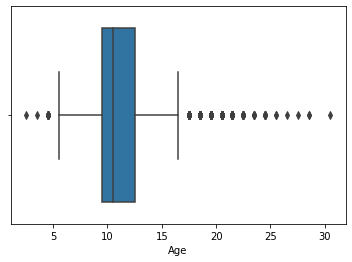

In [20]:
sns.boxplot(x=data['Age'])

In [21]:
Q1= data['Age'].quantile(0.25)
Q2=data['Age'].quantile(0.75)
print(Q1,Q2)

9.5 12.5


In [22]:
IQR=Q2-Q1
IQR

3.0

In [23]:
upper_limit =Q2 + 1.5*IQR
lower_limit =Q1 - 1.5*IQR
upper_limit
lower_limit

5.0

In [24]:
data["Age"] = np.where(data["Age"]<lower_limit,6.52,data["Age"])

<AxesSubplot:xlabel='Age'>

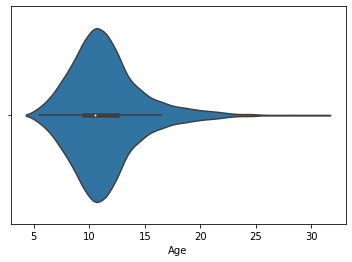

In [25]:
data["Age"] = np.where(data["Age"]<lower_limit,6.52,data["Age"])
sns.violinplot(x=data["Age"])

# 7.CHECK FOR CATEGORICAL COLUMN AND PERFORM ENCODING

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()
data['Age'] = le.fit_transform(data['Age'])

In [27]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,12
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,4
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,6
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,7
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,4


# 8.SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLE

In [28]:
X=data.drop(columns=['Age'],axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [29]:
Y=data['Age']
Y

0       12
1        4
2        6
3        7
4        4
        ..
4172     8
4173     7
4174     6
4175     7
4176     9
Name: Age, Length: 4177, dtype: int64

# 9.SCALE THE INDEPENDENT VARIABLES

In [48]:
from sklearn.preprocessing import scale
X=data.drop(columns=['Shucked_weight'],axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.1010,0.150,12
1,M,0.350,0.265,0.090,0.2255,0.0485,0.070,4
2,F,0.530,0.420,0.135,0.6770,0.1415,0.210,6
3,M,0.440,0.365,0.125,0.5160,0.1140,0.155,7
4,I,0.330,0.255,0.080,0.2050,0.0395,0.055,4


In [ ]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

# 10.SPLIT THE DATA INTO TRAINING AND TEST DATA

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 0)
X_train

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

In [ ]:
X_test

In [ ]:
X_test.shape

In [ ]:
Y_test

In [ ]:
Y_test.shape

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
Y_train.head()

In [ ]:
Y_test.head()

# 11. BUILD THE MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict_train = model.predict(X_train)

# 12. TRAIN THE MODEL

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print('Training accuracy: ',accuracy_score(Y_train,y_predict_train))

# 13. TEST THE MODEL

In [ ]:
print('Testing accuracy: ',accuracy_score(Y_test,y_predict))

# 14. MEASURE THE PERFORMANCE USING METRICS

In [ ]:
pd.crosstab(Y_test,y_predict)

In [ ]:
print(classification_report(Y_test,y_predict))